In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('tips')
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [5]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

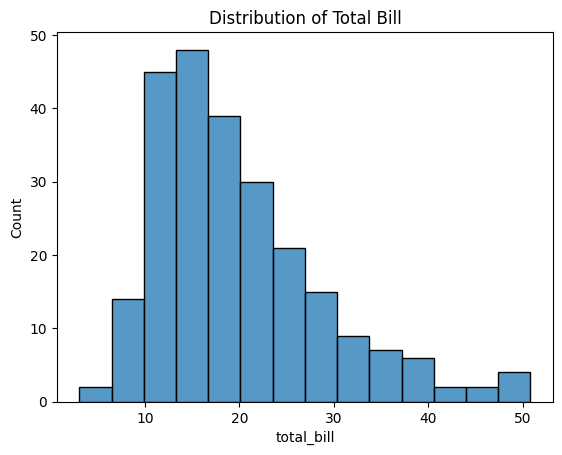

In [9]:
sns.histplot(df['total_bill'])
plt.title('Distribution of Total Bill')
plt.show()

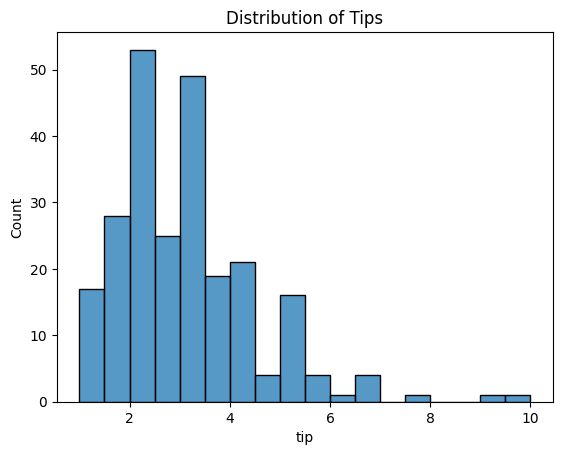

In [10]:
sns.histplot(df['tip'])
plt.title('Distribution of Tips')
plt.show()

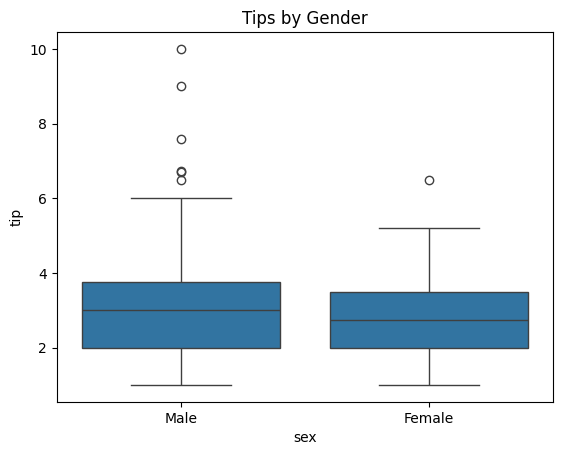

In [20]:
sns.boxplot(x='sex' , y='tip' , data=df)
plt.title('Tips by Gender')
plt.show()

# Gender-wise Tip Analysis

In [26]:

# Step 1: Calculate Q1 and Q3
Q1 = df['tip'].quantile(0.25)
Q3 = df['tip'].quantile(0.75)

# Step 2: Calculate IQR
IQR = Q3 - Q1

# Step 3: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Filter out outliers
df_no_outliers = df[(df['tip'] >= lower_bound) & (df['tip'] <= upper_bound)]

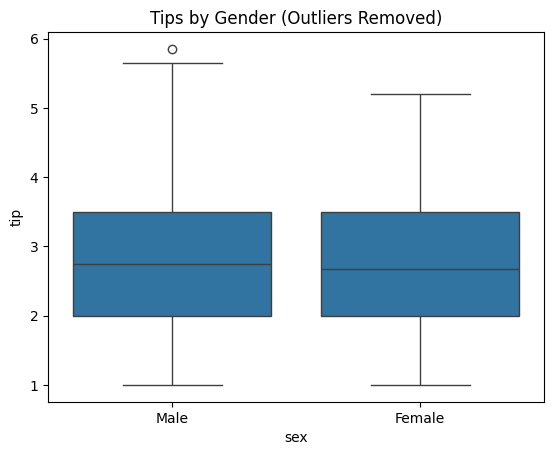

In [30]:
sns.boxplot(x='sex', y='tip', data=df_no_outliers)
plt.title('Tips by Gender (Outliers Removed)')
plt.show()


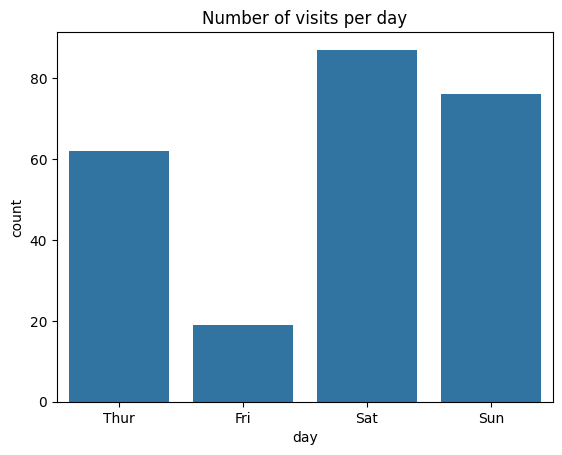

In [41]:
sns.countplot(x='day' , data=df)
plt.title('Number of visits per day')
plt.show()



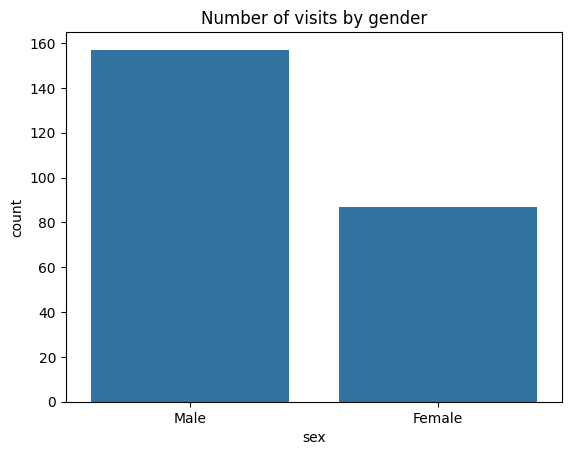

In [44]:
sns.countplot(x='sex' , data=df)
plt.title('Number of visits by gender')
plt.show()

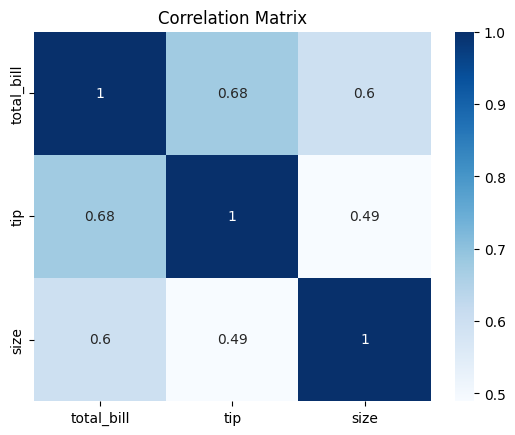

In [64]:
sns.heatmap(df2.corr(), annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [62]:
df2 = df.select_dtypes(include='number')
df2.head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


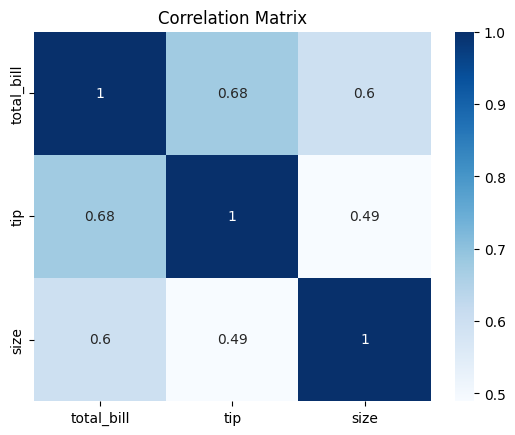

In [65]:
sns.heatmap(df2.corr() , annot=True , cmap= 'Blues')
plt.title('Correlation Matrix')
plt.show()

In [66]:
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


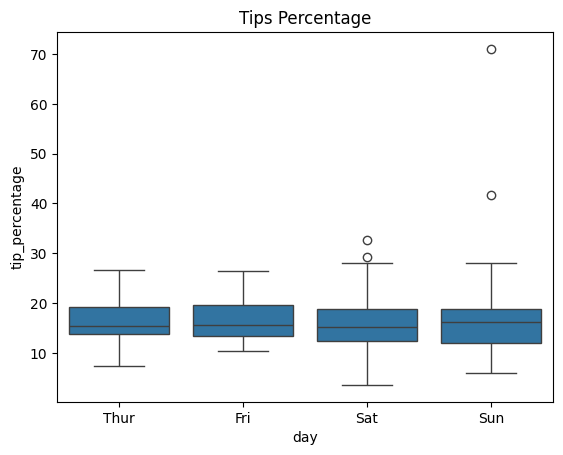

In [70]:
sns.boxplot(x='day' , y='tip_percentage' , data=df)
plt.title('Tips Percentage')
plt.show()

# Day-wise Tip Distribution

In [74]:
df.groupby('smoker')['tip_percentage'].mean()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12772\3494168819.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('smoker')['tip_percentage'].mean()


smoker
Yes    16.319604
No     15.932846
Name: tip_percentage, dtype: float64

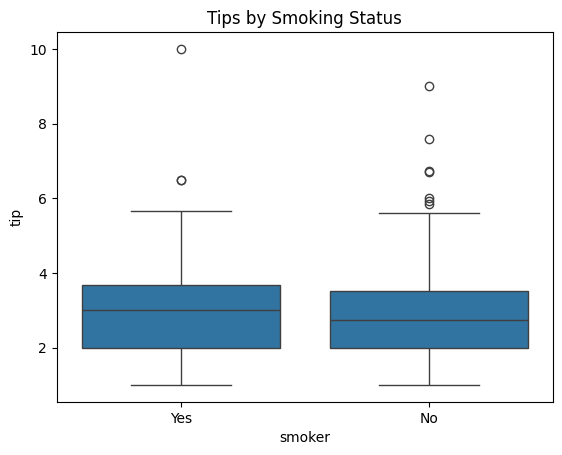

In [76]:
sns.boxplot(x='smoker', y='tip', data=df)
plt.title('Tips by Smoking Status')
plt.show()

# Smoker vs Non-Smoker — Tip Comparison

In [80]:
df.groupby('time')['total_bill'].mean()

C:\Users\Dell\AppData\Local\Temp\ipykernel_12772\1690409114.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('time')['total_bill'].mean()


time
Lunch     17.168676
Dinner    20.797159
Name: total_bill, dtype: float64

In [ ]:
# Every student should think of 5 insights regarding above data and explain, why the insight was chosen, what was the outcome and what is the benefit to the business due to this insight

📌**Insight 1:**
 Males Tend to Give Slightly Higher Tips than Females

**💬 Business Question:**
 Males Tend to Give Slightly Higher Tips than Females

** 📊 Insight:**
Average Tip (Male): 3.09
Average Tip (Female): 2.83

**💼 Business Benefit:**
Male customers tend to tip slightly higher. Staff can be strategically assigned or trained for high-tipping groups (e.g. male-dominant tables), improving tips and satisfaction.


**📌 Insight 2:**
Tip Amount Increases with Total Bill

**💬 Business Question:**
Is there a correlation between total bill and tip?

**📊 Insight:**
Correlation between total_bill and tip = 0.68 (strong positive)

**💼 Business Benefit:**
Bigger bills lead to bigger tips. Promoting premium items or upselling can lead to better earnings and tips for staff.

**📌 Insight 3:**
Non-Smokers Give Higher Tip Percentage

**💬 Business Question:**
Do smokers or non-smokers tip better as a percentage of the bill?

**📊 Insight:**
Tip % (Non-smokers): ~16.7%
Tip % (Smokers): ~15.3%

**💼 Business Benefit:**
Non-smokers are slightly more generous. Better service/staffing in non-smoking areas can yield higher overall tips.

**📌 Insight 4:**
Sundays and Saturdays Have Highest Customer Visits

**💬 Business Question:**
What are the busiest days of the week?


**📊 Insight:**
Weekends (Saturday, Sunday) show the highest number of customer visits.

**💼 Business Benefit:**
Optimize staffing, stock, and operations for weekends to maximize customer satisfaction and efficiency.


**📌 Insight 5:**
Dinner Time Brings in Higher Total Bills


**💬 Business Question:**
Is there a difference in spending between lunch and dinner?

**📊 Insight:**
Dinner: Higher average bill (20.79)
Lunch: Lower average bill (17.15)

**💼 Business Benefit:**
Focus marketing and staff training on dinner hours to drive more revenue and better customer experience.


In [ ]:
               # Insight 1: Males Tend to Give Slightly Higher Tips than Females

plt.figure(figsize=(5,3))
sns.boxplot(x='sex', y='tip', data=df)
plt.title('Tips by Gender')
plt.show()

# Tip average by gender
df.groupby('sex')['tip'].mean()


In [ ]:
               # Insight 2: Tip Amount Increases with Total Bill

# Scatter plot
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Tip vs Total Bill')
plt.show()

# Correlation
df[['total_bill', 'tip']].corr()


In [81]:
                 #  Insight 3: Non-Smokers Give Higher Tip Percentage


# Create tip percentage column
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

# Tip % by smoker
df.groupby('smoker')['tip_percentage'].mean()


C:\Users\Dell\AppData\Local\Temp\ipykernel_12772\928656478.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('smoker')['tip_percentage'].mean()


smoker
Yes    16.319604
No     15.932846
Name: tip_percentage, dtype: float64

In [ ]:
          # Insight 4: Sundays and Saturdays Have Highest Customer Visits

sns.countplot(x='day', data=df)
plt.title('Number of Visits Per Day')
plt.show()


In [ ]:
           # Insight 5: Dinner Time Brings in Higher Total Bills

df.groupby('time')['total_bill'].mean()
